In [5]:
# loading libraries
import numpy  as np                
import pandas as pd
import matplotlib.pyplot as plt   

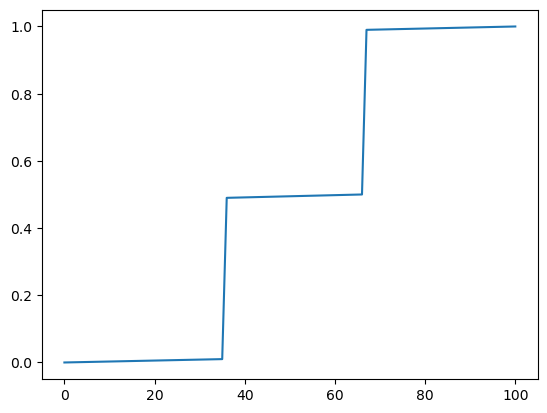

C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


0
0
100
39


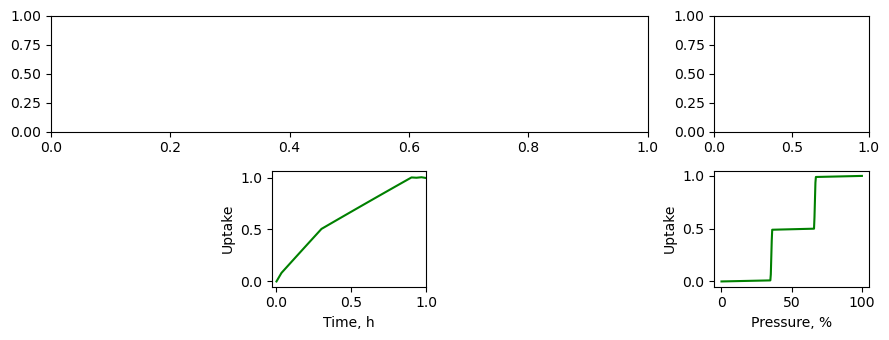

In [6]:
x = [0, 35, 36, 66, 67, 100]
x0 = 0
c0 = 0.1
y = [0, 0.01, 0.49, 0.50, 0.99, 1.00]
plt.plot(x, y)
plt.show()

from scipy import interpolate
f_ads = interpolate.interp1d(y, x, fill_value="extrapolate")

def isotherm_interpolate_uptake_to_RH_ads(t):
    return f_ads(t)

f_des = interpolate.interp1d(y, x, fill_value="extrapolate")

def isotherm_interpolate_uptake_to_RH_des(t):
    return f_des(t)

f_ads2 = interpolate.interp1d( x, y,fill_value="extrapolate")

def isotherm_interpolate_RH_to_uptake_ads(t):
    return f_ads2(t)

f_des2 = interpolate.interp1d( x, y,fill_value="extrapolate")

def isotherm_interpolate_RH_to_uptake_des(t):
    return f_des2(t)


zero_mass = 12.18
Kads = 0.3/zero_mass
Kdes = 0.3/zero_mass
dmdt = 0.001

step_list = [0,  25, 40, 50, 60, 75,  100 ]

#### plot

fig, axs = plt.subplot_mosaic(    
    """
    AAAB
    .C.D
    """
                              ,figsize=(9, 3.5), constrained_layout=True)

#### plot D
axs['D'].plot( np.linspace(0, 100, num=300), 
                 isotherm_interpolate_RH_to_uptake_ads(np.linspace(0, 100, num=300)), c='green')
axs['D'].set_ylabel('Uptake')
axs['D'].set_xlabel('Pressure, %')

plt.tight_layout()


#### plot C
step_list = [0,  100 ]

t_range = [0]
w_range = [0]
rh_range = [0]
for k, RH in enumerate(step_list):
    print(RH)
    uptake_out = []
    B = w_range[-1]
    t0 = 0
    for i, t in enumerate(np.linspace(0, 100,  num=3000)):
        B = B + (t-t0)*(np.multiply( Kads* (RH - isotherm_interpolate_uptake_to_RH_ads(B)) , RH>isotherm_interpolate_uptake_to_RH_ads(B)) \
        + np.multiply( Kdes * (RH - isotherm_interpolate_uptake_to_RH_des(B)), RH<isotherm_interpolate_uptake_to_RH_des(B))   
                  )  
        uptake_out.append(B)
        t0=t
        if np.abs(isotherm_interpolate_RH_to_uptake_ads(RH)-B)<dmdt: 
            w_range = uptake_out
            t_range = [j+t_range[-1] for j in np.linspace(0, 100,  num=3000)[:(i+1)]]
            rh_range = [RH for i in uptake_out]
            print(i)
            break

axs['C'].plot( t_range, w_range , c='green')
axs['C'].set_ylabel('Uptake')
axs['C'].set_xlabel('Time, h')
axs['C'].set_xlim([-0.03, 1])
plt.tight_layout()
plt.savefig('Figure_kinetics-isotherm.png', dpi=1200, transparent=True)

